# Week 3: Logistic Regression

## Multiple Linear Regression 

In [1]:
%%time
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

print(torch.cuda.is_available())

False
CPU times: user 2.76 s, sys: 1.35 s, total: 4.11 s
Wall time: 4.12 s


In [2]:
torch.manual_seed(1)

In [3]:
from torch.nn import Linear

model = Linear(in_features=2, out_features=1)

In [4]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.3643, -0.3121]], requires_grad=True),
 Parameter containing:
 tensor([-0.1371], requires_grad=True)]

In [6]:
X = torch.tensor([[1.0, 1.0],[1.0,2.0],[1.0,3.0]])
X

tensor([[1., 1.],
        [1., 2.],
        [1., 3.]])

In [7]:
yhat = model(X)
yhat

tensor([[-0.0848],
        [-0.3969],
        [-0.7090]], grad_fn=<AddmmBackward0>)

In [12]:
from torch import nn, optim

class LR(nn.Module):
    def __init__(self, input_size, output_size):
        super(LR, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        return self.linear(x)

In [9]:
model = LR(2, 1)
model

LR(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)

In [11]:
yhat = model(X)
yhat

tensor([[ 0.0903],
        [-0.5754],
        [-1.2411]], grad_fn=<AddmmBackward0>)

In [13]:
from torch.utils.data import Dataset, DataLoader

class Data2D(Dataset):
    def __init__(self):
        self.x = torch.zeros(20,2)
        self.x[:,0] = torch.arange(-1,1,0.1)
        self.x[:,1] = torch.arange(-1,1,0.1)
        self.w = torch.tensor([[1.0],[1.0]])
        self.b=1
        self.f=torch.mm(self.x, self.w)+ self.b
        self.y=self.f+0.1*torch.randn((self.x.shape[0], 1))
        self.len = self.x.shape[0]

    def __getitem__(self, index):
        return self.x[index], self.y[index]
    def __len__(self):
        return self.len
    


In [26]:
ds = Data2D()
criterion = nn.MSELoss()
loader = DataLoader(dataset=ds, batch_size=1)
model = LR(2,2)
optimizer = optim.SGD(model.parameters(), lr=0.1)


In [27]:
losss = []
for epoch in range(10):
    total = 0
    for x,y in loader:
        yhat = model(x)
        loss = criterion(yhat,y)
        total += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    losss.append(total)

/home/tuan/miniconda3/envs/pytorch-learning/lib/python3.9/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([1, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


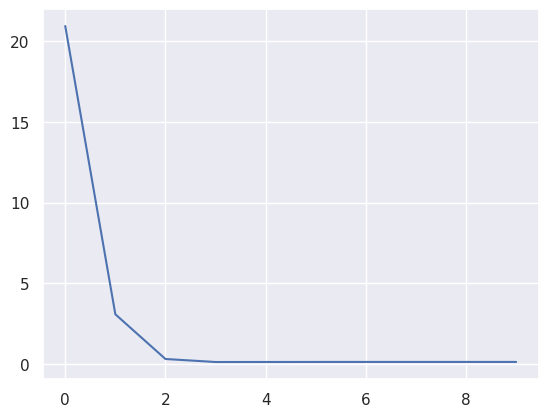

In [28]:
plt.plot(losss)
plt.show()